<a href="https://colab.research.google.com/github/shunitami/Qiita_Contents/blob/master/sklearn_SwissRoll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learnによるSwiss Roll の次元削減
## Swiss Rollは以下のように s,tのパラメタで表現した


$
\omega=4\pi\frac{1}{200}\\
s\ (0\leq s <20.0)\\
t\ (0\leq t <200.0)\\
R=10\frac{200-t}{200}+1\\
x=s\\
y=Rsin(\omega t)\\
z=Rcos(\omega t)\\
$

In [0]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

### Swiss Rollのデータセット作成

In [0]:
n_data=300
label=np.zeros(n_data)
SW=np.zeros((n_data,3))
SX=np.zeros((n_data,2))
for n in range(n_data):
        SW[n,0]=np.random.rand()*20
        iy=np.random.rand()*200
        SX[n,0]=SW[n,0]
        SX[n,1]=iy
        SW[n,1]=(10*((200-iy)/200)+1)*np.sin(iy/200*4*np.pi)
        SW[n,2]=(10*((200-iy)/200)+1)*np.cos(iy/200*4*np.pi)
        label[n]=iy//20

x=SW[:,0]
y=SW[:,1]
z=SW[:,2]

NameError: ignored

#### スイスロールの生地データ わかりやすいようにプロットは xが縦軸、yを横軸にしている。これを右の赤い側からぐるぐるっと巻くイメージ

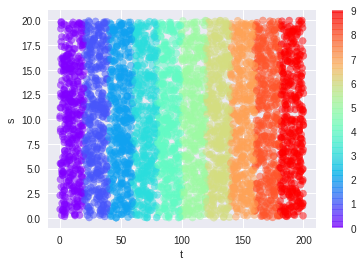

In [0]:
fig=plt.figure()
plt.scatter(SX[:,1],SX[:,0],c=label,cmap='rainbow',alpha=0.5)
plt.xlabel('t')
plt.ylabel('s')
plt.colorbar()

#### スイスロールのプロット

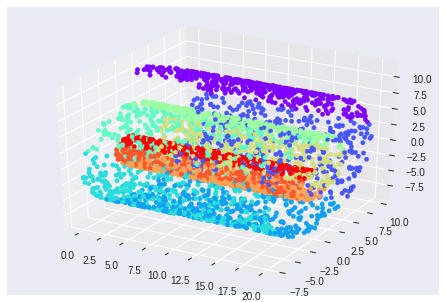

In [0]:
fig=plt.figure()
ax=Axes3D(fig)
ss=ax.scatter(x,y,z,c=label,cmap='rainbow',alpha=1)

#### t-SNEでの次元削減 2次元 perplexity=30 n_iter=1000

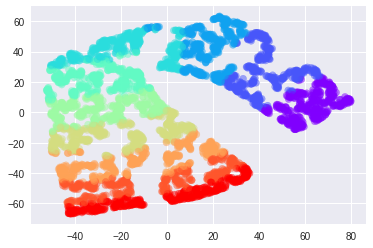

In [0]:
decomp=TSNE(n_components=2,perplexity=30,n_iter=1000)
SW_decomp_TSNE=decomp.fit_transform(SW)
fig=plt.figure()
test=plt.scatter(SW_decomp_TSNE[:,0],SW_decomp_TSNE[:,1],c=label,cmap='rainbow',alpha=0.5)

#### Isomapでの次元削減 n_neighbors=10 t-SNEよりも構造がうまく分離できている

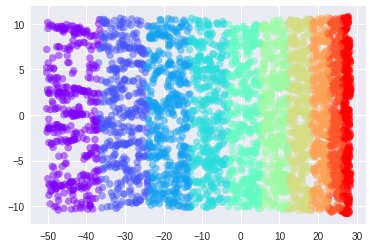

In [0]:
isomap=Isomap(n_neighbors=10,n_components=2)
SW_isomap=isomap.fit_transform(SW)
fig=plt.figure()
plt.scatter(SW_isomap[:,0],SW_isomap[:,1],c=label,cmap='rainbow',alpha=0.5)

#### PCAによる次元削減 線形変換では解決できない。

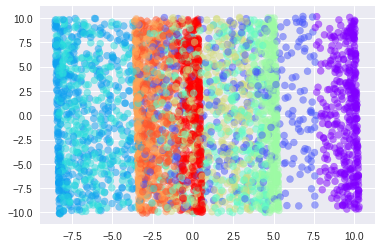

In [0]:
decomp=PCA(n_components=2)
SW_decomp=decomp.fit_transform(SW)
fig=plt.figure()
plt.scatter(SW_decomp[:,1],SW_decomp[:,0],c=label,cmap='rainbow',alpha=0.5)